## Import Library

In [1]:
import pandas as pd # For manipulate and analyze data I/O dataframe
import numpy as np # For numeric and computation operation
import matplotlib.pyplot as plt # For visualization of graph and plot
import seaborn as sns # Built on plt, provide more satisfying visualization
import warnings # Handle the showed warning
warnings.filterwarnings("ignore")

## Download Dataset

In [2]:
# %pip install kaggle

In [3]:
# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()
# api.dataset_download_files('varshitanalluri/crop-recommendation-dataset', unzip=True)

### Data Preprocessing

In [4]:
df = pd.read_csv('Crop_Recommendation.csv')
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


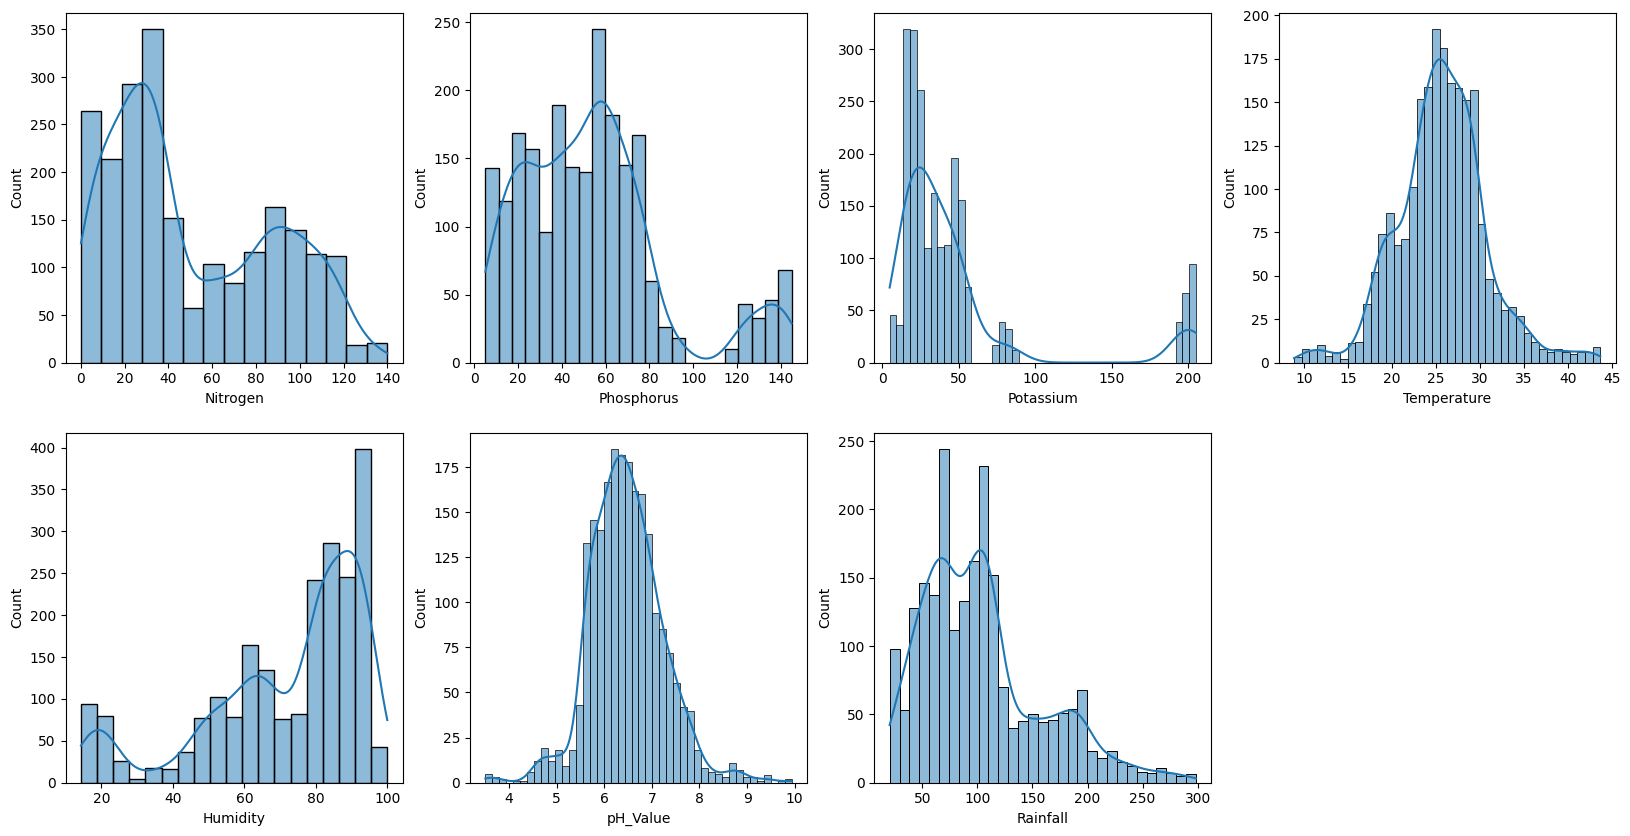

In [6]:
plt.figure(figsize=(20, 10))
n = 0
for cols in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']:
    n += 1
    plt.subplot(2, 4, n)
    sns.histplot(df[cols], kde=True)
    plt.ylabel('Count')

plt.show()

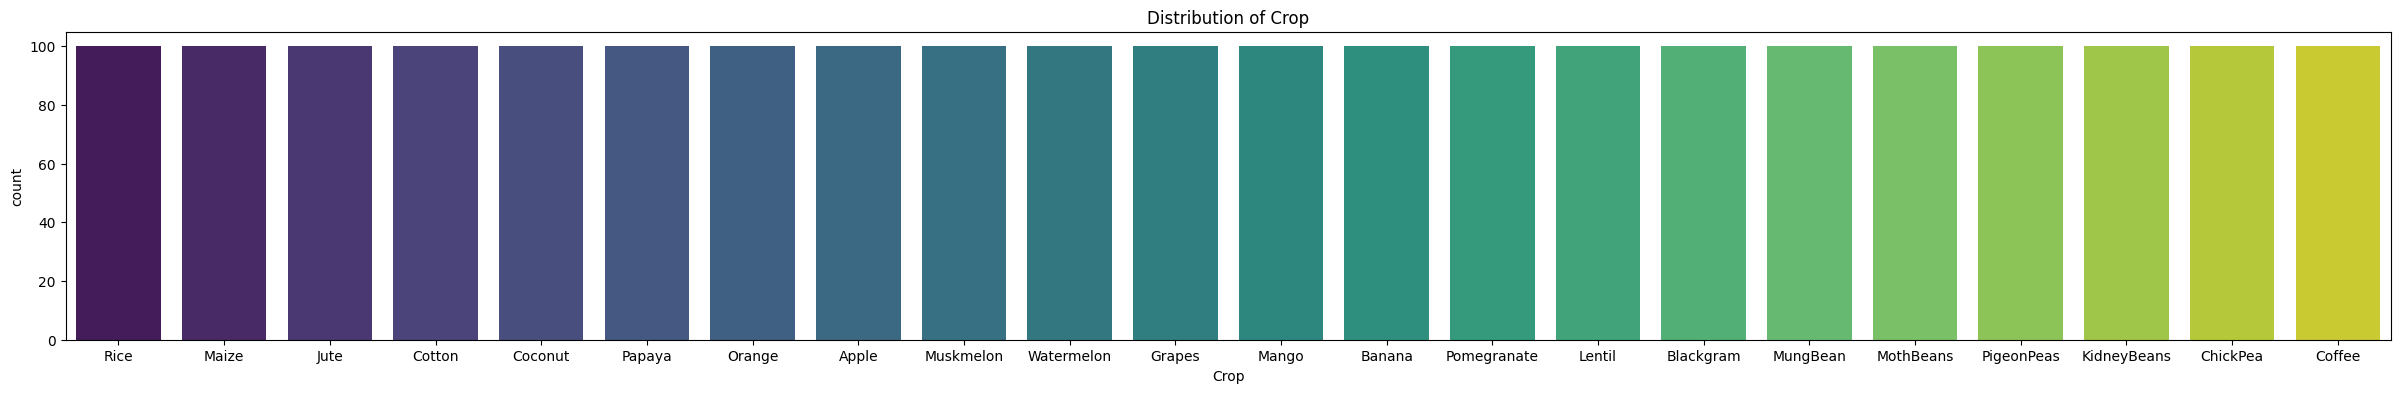

In [7]:
plt.figure(figsize=(30, 4))
sns.countplot(x='Crop', data=df, order=df['Crop'].value_counts().index, palette='viridis')
plt.title('Distribution of Crop')

plt.show()

## Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder

df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [9]:
label_encoder = LabelEncoder()
df['CropEncode'] = label_encoder.fit_transform(df['Crop'])
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,CropEncode
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,20


In [12]:
unique_values = df[['Crop', 'CropEncode']].drop_duplicates().sort_values('CropEncode')

unique_values

,Crop,CropEncode
1500,Apple,0
1000,Banana,1
700,Blackgram,2
200,ChickPea,3
1800,Coconut,4
2100,Coffee,5
1900,Cotton,6
1200,Grapes,7
2000,Jute,8
300,KidneyBeans,9


In [13]:
df.drop('Crop', axis=1, inplace=True)
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,CropEncode
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   CropEncode   2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


## Split Dataset

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
train_df.shape, test_df.shape

((1760, 8), (440, 8))

## Export Dataset

In [17]:
train_df.to_csv('data_train.csv', index=False)
test_df.to_csv('data_test.csv', index=False)